In [1]:
"""
Importação das bibliotecas utilizadas na questão:
1. Numpy = Fornece um grande conjunto de funções e operações de biblioteca 
que auxiliam na realização de cálculos numéricos e manipulação de matrizes.

2. Pandas = Realiza a normalização dos dados.

3. Matplotlib = Trata-se de uma biblioteca que é utilizada para plotar gráficos

4. Matplotlib = Trata-se de uma biblioteca que é utilizada para plotar gráficos em 3d
"""
import pandas as pd
import numpy as np
from plotnine import *
import plotly.express as px

In [2]:
"""
Função responsável por fazer a leitura dos datasets.
Parâmetros da função: 
primeiro parâmetro = nome do arquivo, 
delimeter = trata-se do que tá separando cada valor do dataset. 
"""
df = np.genfromtxt('./datasets/ex1data2.txt', delimiter= ' ')

In [3]:
"""
Comando realiza a normalização em um data frame e atibui o valor a data_nor e exibe os valores.
"""
data_nor = pd.DataFrame(data=df, columns=['Área','Número de quartos','Preço'])
data_nor

,Área,Número de quartos,Preço
0,2.104,3.0,3.99900
1,1.600,3.0,3.29900
2,2.400,3.0,3.69000
3,1.416,2.0,2.32000
4,3.000,4.0,5.39900
5,1.985,4.0,2.99900
6,1.534,3.0,3.14900
7,1.427,3.0,1.98999
8,1.380,3.0,2.12000
9,1.494,3.0,2.42500


In [4]:
fig = px.scatter_3d(data_nor, x = 'Área', y = 'Número de quartos', z = 'Preço')
fig.update_traces(marker=dict(size=5))
fig.show()

In [12]:
"""
Função Gradiente Descedente Multivalorado
"""
alfa= 0.01;
epoca=100;
data = df
w0 = 1
w1 = 3
w2 = 1
EQM= list()
for i in range(epoca):
  np.random.shuffle(data)
  sum_EQM = 0
  for j in range(len(data)):
    x = data[j][0:2]
    y = data[j][2]
    y_esp = (w0 + w1 * x[0] + w2 * x[1])
    erro = y - y_esp
    sum_EQM += erro*erro
  w0 += alfa * erro
  w1 += alfa * erro * x[0]
  w2 += alfa * erro * x[1]
  EQM.append(sum_EQM/len(data))

In [13]:
"""
Printando pesos encontrados
"""
print("Os pesos encontrados foram", w0, "e", w1, "e", w2)

Os pesos encontrados foram 0.6220956428742633 e 1.9080994163337814 e -0.3247787629999601


In [14]:
"""
Convertendo os dados do erro quadrático médio e exibindo.
"""
EQM_df = pd.DataFrame(data=EQM, columns=[0])
EQM_df

,0
0,49.643360
1,30.657930
2,27.130050
3,23.130691
4,15.469547
...,...
95,0.548081
96,0.525753
97,0.523028
98,0.530231


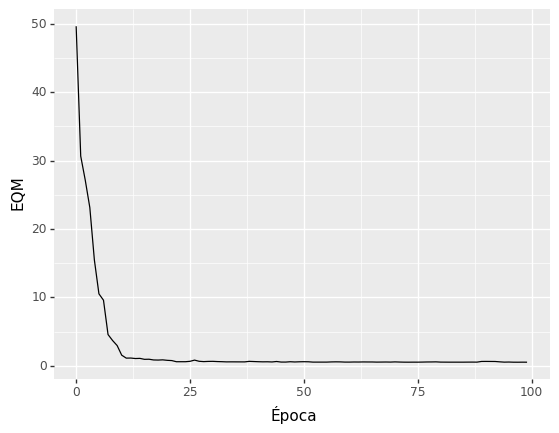

<ggplot: (8745884248649)>

In [15]:
"""
Plotando o erro quadrático médio em um gráfico com o auxílio do plotnine 
"""
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

**Comentários: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ?**


O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 40 na primeira época e que seu valor final ficou próximo de 0. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

In [9]:
"""
Econtrando os coeficientes de regressão utilizando os mínimos quadrados.
"""
data = np.append(np.ones((47, 1)), df, axis=1)
x=data[:,0:3]
y=data[:,3]
np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)),x.T),y)

array([ 0.8959791 ,  1.39210674, -0.08738019])

**Comentários: Os valores obtidos pelos dois métodos são iguais?**

Os valores não são iguais, porém ficam muito próximos. O valor obtido por meio do método dos mínimos quadrados é possivelmente mais preciso, pois a sua solução é analítica, muito embora erros númericos possam existir devido ao processo de inversão de matrizes.